In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as p

Import of Pandas and Matplotlib + some _magic_ to display graphs in the notebook.

In [2]:
dfb=pd.read_csv('2013---2015-dfb-ambulance.csv')
dfb.head()

,Date,Station Area,Clinical Status,TOC,ORD,MOB,IA,LS,AH,MAV,CD
0,01/01/2013,Tallaght,Non ProQa Class,00:02:09,00:04:14,00:04:58,00:10:16,NaN,NaN,00:27:47,00:29:24
1,01/01/2013,Tara St,Bravo,00:02:41,00:14:41,00:15:04,00:18:10,NaN,NaN,00:20:52,00:22:47
2,01/01/2013,Finglas,Delta,00:13:52,00:16:26,00:16:51,00:25:06,00:29:36,00:37:35,00:41:49,00:47:15
3,01/01/2013,Tara St,Bravo,00:06:58,00:22:33,00:22:59,00:34:48,NaN,NaN,00:43:21,00:44:18
4,01/01/2013,Tara St,Alpha,00:14:56,00:23:25,00:23:35,00:27:25,00:39:19,NaN,01:05:37,01:12:15


Loading the file and displaying the top 5 rows.

Since it's a file without metadata (ie TOC is a string not a time for Pandas right now), we need some prep work.

It's easy to check this thanks to the attribute dtypes:

In [3]:
dfb.dtypes

Date               object
Station Area       object
Clinical Status    object
TOC                object
ORD                object
MOB                object
IA                 object
LS                 object
AH                 object
MAV                object
CD                 object
dtype: object

We're going to leave aside the various timings and only focus on Date, Station Area and Clinical Status.

Only Date will need to be converted to DateTime type in order to be able to do some interesting things with it, _ie grouping by day of week_


You can actually have Pandas do that for you when you load the file:

In [4]:
dummy=pd.read_csv('2013---2015-dfb-ambulance.csv',parse_dates=[0],infer_datetime_format=True)
dummy.dtypes

Date               datetime64[ns]
Station Area               object
Clinical Status            object
TOC                        object
ORD                        object
MOB                        object
IA                         object
LS                         object
AH                         object
MAV                        object
CD                         object
dtype: object

Here I'm telling Pandas to use column 0 (most languages use a 0-based index, therefore column #1 for us is #0 for Python -- just a friendly reminder) and to guess the date format.

In [5]:
del dummy
#freeing up some memory

The alternative is to explicitly tell Pandas to convert to a specific _type:_

In [6]:
%timeit pd.to_datetime(dfb['Date'],format='%d/%m/%Y')

1 loop, best of 3: 1.02 s per loop


In [7]:
%timeit pd.to_datetime(dfb['Date'],infer_datetime_format=True)

1 loop, best of 3: 26.3 s per loop


There's some obvious value in taking the time to provide a format which lets Pandas know how to process it vs having it guess. Here on a 20MB file, it takes almost nearly 30 seconds more time on my MBP.

Imagine what it'd be on a much larger file.

It's also fairly easy to grasp the [syntax](http://strftime.org/).

In [8]:
dfb['Date']=pd.to_datetime(dfb['Date'],format='%d/%m/%Y')
dfb['Date']

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2013-01-01
4        2013-01-01
5        2013-01-01
6        2013-01-01
7        2013-01-01
8        2013-01-01
9        2013-01-01
10       2013-01-01
11       2013-01-01
12       2013-01-01
13       2013-01-01
14       2013-01-01
15       2013-01-01
16       2013-01-01
17       2013-01-01
18       2013-01-01
19       2013-01-01
20       2013-01-01
21       2013-01-01
22       2013-01-01
23       2013-01-01
24       2013-01-01
25       2013-01-01
26       2013-01-01
27       2013-01-01
28       2013-01-01
29       2013-01-01
            ...    
220798   2015-12-31
220799   2015-12-31
220800   2015-12-31
220801   2015-12-31
220802   2015-12-31
220803   2015-12-31
220804   2015-12-31
220805   2015-12-31
220806   2015-12-31
220807   2015-12-31
220808   2015-12-31
220809   2015-12-31
220810   2015-12-31
220811   2015-12-31
220812   2015-12-31
220813   2015-12-31
220814   2015-12-31
220815   2015-12-31
220816   2015-12-31


to_datetime() can be a bit tricky to properly get, so it's best to have a look at the [doc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html#pandas.to_datetime).

---

#### Group By

Let's get cracking and look into the actual data. The above shows us that the date range is from the 1st day of 2013 till the last day of 2015.

In [9]:
monthly_view=dfb.groupby(dfb['Date'].dt.month).count()
monthly_view

,Date,Station Area,Clinical Status,TOC,ORD,MOB,IA,LS,AH,MAV,CD
Date,,,,,,,,,,,
1,17921,17921,17921,17921,17921,17541,15074,11934,12346,16890,17921
2,16745,16745,16745,16745,16745,16422,14177,11275,11589,15814,16745
3,18764,18764,18764,18764,18764,18412,15890,12634,12788,17756,18764
4,17641,17641,17641,17641,17641,17254,14880,11742,12199,16567,17641
5,18730,18730,18730,18730,18730,18354,15822,12395,12701,17693,18730
6,18300,18300,18300,18300,18300,17934,15407,12068,12373,17277,18300
7,18709,18709,18709,18709,18709,18348,15726,12377,12810,17622,18709
8,18064,18064,18064,18064,18064,17698,15207,12013,12436,17054,18064
9,18902,18902,18902,18902,18902,18481,15827,12351,12472,17730,18902


I've created a 'Group By' which, as its name implies, group (data) by a given criterion;
Here I'm using a specific attribute of the Datetime class, the current month and then apply the count() function (fairly explicit)

***NB: This filters by month only, therefore it merges over the 3 years of data for each month.***

---

If you look carefully, you'll see some discrepancies for any given month, ie January has 17921 interventions but MOB,IA,LS,AH and MAV have a lower count because some cases do not require data here.

We can see that the numbers are fairly consistent over the months with a slight increase in December.

In [10]:
monthly_per_year_view=dfb.groupby([dfb['Date'].dt.month,dfb['Date'].dt.year]).count()
monthly_per_year_view

Date  Station Area  Clinical Status   TOC   ORD   MOB    IA    LS  \
Date Date                                                                      
1    2013  5984          5984             5984  5984  5984  5861  5047  4069   
     2014  5826          5826             5826  5826  5826  5732  4903  3964   
     2015  6111          6111             6111  6111  6111  5948  5124  3901   
2    2013  5493          5493             5493  5493  5493  5391  4668  3801   
     2014  5623          5623             5623  5623  5623  5513  4756  3804   
     2015  5629          5629             5629  5629  5629  5518  4753  3670   
3    2013  6372          6372             6372  6372  6372  6253  5351  4427   
     2014  6158          6158             6158  6158  6158  6053  5253  4158   
     2015  6234          6234             6234  6234  6234  6106  5286  4049   
4    2013  5932          5932             5932  5932  5932  5828  4985  4008   
     2014  5780          5780             5780  5780  5780  5656  4955  3882   
     2015  5929          5929             5929  5929  5929  5770  4940  3852   
5    2013  6250          6250             6250  6250  6250  6135  5257  4280   
     2014  6068          6068             6068  6068  6068  5944  5169  4031   
     2015  6412          6412             6412  6412  6412  6275  5396  4084   
6    2013  6136          6136             6136  6136  6136  6000  5213  4044   
     2014  5923          5923             5923  5923  5923  5816  4966  4033   
     2015  6241          6241             6241  6241  6241  6118  5228  3991   
7    2013  6377          6377             6377  6377  6377  6257  5322  4301   
     2014  6059          6059             6059  6059  6059  5943  5166  4027   
     2015  6273          6273             6273  6273  6273  6148  5238  4049   
8    2013  5940          5940             5940  5940  5940  5833  5063  4000   
     2014  5832          5832             5832  5832  5832  5715  4900  3979   
     2015  6292          6292             6292  6292  6292  6150  5244  4034   
9    2013  6273          6273             6273  6273  6273  6132  5236  4097   
     2014  6178          6178             6178  6178  6178  6015  5187  4018   
     2015  6451          6451             6451  6451  6451  6334  5404  4236   
10   2013  6102          6102             6102  6102  6102  5988  5109  4085   
     2014  6089          6089             6089  6089  6089  5948  5102  4061   
     2015  6582          6582             6582  6582  6582  6440  5505  4265   
11   2013  5809          5809             5809  5809  5809  5703  4845  3904   
     2014  6066          6066             6066  6066  6066  5954  5113  4002   
     2015  6271          6271             6271  6271  6271  6130  5173  4091   
12   2013  6572          6572             6572  6572  6572  6451  5443  4379   
     2014  6584          6584             6584  6584  6584  6429  5477  4052   
     2015  6977          6977             6977  6977  6977  6792  5699  4410   

             AH   MAV    CD  
Date Date                    
1    2013  4241  5720  5984  
     2014  3968  5475  5826  
     2015  4137  5695  6111  
2    2013  3953  5245  5493  
     2014  3884  5322  5623  
     2015  3752  5247  5629  
3    2013  4490  6085  6372  
     2014  4209  5847  6158  
     2015  4089  5824  6234  
4    2013  4162  5645  5932  
     2014  4010  5438  5780  
     2015  4027  5484  5929  
5    2013  4418  5982  6250  
     2014  4146  5748  6068  
     2015  4137  5963  6412  
6    2013  4158  5831  6136  
     2014  4136  5634  5923  
     2015  4079  5812  6241  
7    2013  4360  6044  6377  
     2014  4209  5754  6059  
     2015  4241  5824  6273  
8    2013  4154  5666  5940  
     2014  4106  5511  5832  
     2015  4176  5877  6292  
9    2013  4240  5935  6273  
     2014  4170  5822  6178  
     2015  4062  5973  6451  
10   2013  4163  5792  6102  
     2014  4137  5740  6089  
     2015  4218  6069  6582  
11   2013 

By passing a list of criteria, we can create nested groupings which allows us to get this breakdown by month and then year.

In [11]:
monthly_per_year_view.index.names=['Month','Year']
monthly_per_year_view.head(3)

Date  Station Area  Clinical Status   TOC   ORD   MOB    IA    LS  \
Month Year                                                                      
1     2013  5984          5984             5984  5984  5984  5861  5047  4069   
      2014  5826          5826             5826  5826  5826  5732  4903  3964   
      2015  6111          6111             6111  6111  6111  5948  5124  3901   

              AH   MAV    CD  
Month Year                    
1     2013  4241  5720  5984  
      2014  3968  5475  5826  
      2015  4137  5695  6111

I've renamed the indexes to have a better control when manipulating the dataset.

---

#### Plotting

Let's try to translate that into a nice chart.

While you can use Matplotlib directly and go through their doc, Pandas makes it easier by simply calling plot() or plot._chart-type_
The [doc](http://pandas.pydata.org/pandas-docs/stable/visualization.html#other-plots) highlights the various types of visualisations available

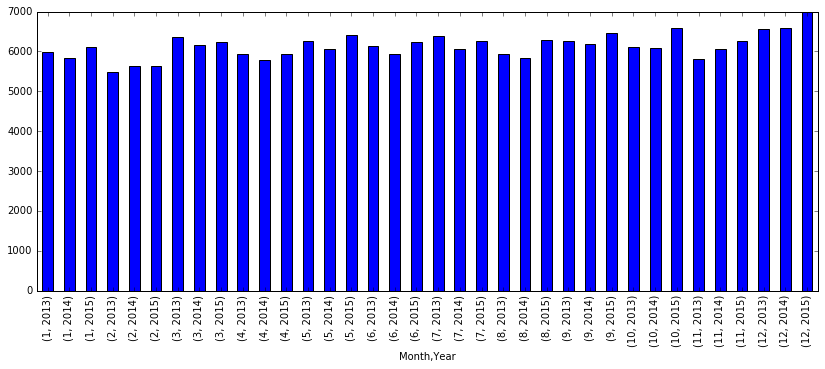

In [12]:
monthly_per_year_view['Date'].plot.bar(figsize=(14, 5))
p.show()

A couple of things that you'll probably notice:

* I have selected only the column 'Date' in order to get a cleaner display and because we're only looking at all the interventions

* Given the grouping per month then per year, the sequence in the graph follows that logic (so JAN 13,14,15 then FEB 13,14,15, etc ...) and is hardly practical for comparison

* figsize allows you define a custom size (in inches 😯❓)

* p.show() is a workaround for when the graph doesn't show but you still get something like : <matplotlib.axes._subplots.AxesSubplot at 0x1194d6dd0> or if you have more than one graph for a cell, as you'll see later.

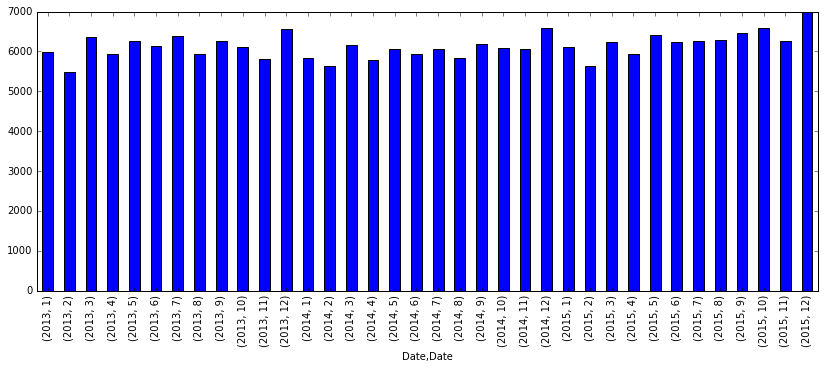

In [13]:
yearly_per_month_view=dfb.groupby([dfb['Date'].dt.year,dfb['Date'].dt.month]).count()
yearly_per_month_view['Date'].plot.bar(figsize=(14, 5))

Changing the grouping is a workaround but I'm still not satisfied with the display since now the year on year is less easy to read.

There's probably a way to make it good for both kind of reading (YoY and MoM).

This took me a while to figure out and that's because the solution is mostly to transform (*yet again*) our Grouped view, through the use of [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unstack.html) :

In [14]:
unstacked_month_year=monthly_per_year_view['Date'].unstack()
unstacked_month_year

Year,2013,2014,2015
Month,,,
1,5984,5826,6111
2,5493,5623,5629
3,6372,6158,6234
4,5932,5780,5929
5,6250,6068,6412
6,6136,5923,6241
7,6377,6059,6273
8,5940,5832,6292
9,6273,6178,6451


Unstack's (and its counterpart stack) main goal is to reshape the structure of your containers ( Dataframes / Series).

Reading the [doc](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-stacking-and-unstacking) (and the cookbooks / tutorials) on this topic is highly recommended because if you're not familiar with this type of manipulation, you might end up reinventing the wheel / pursue dead ends.

Been there, done that.

---

#### Styling and grouped bars

Now let's plot this new view.

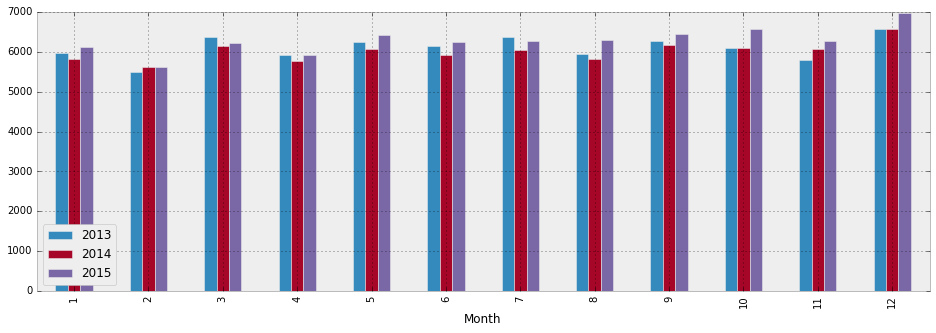

In [15]:
p.style.use('bmh')
unstacked_month_year.plot.bar(figsize=(16, 5))
p.legend(loc=3)

Now we get a graph that is both readable for month on month and year on year.

We've also change the style to something a bit more colourful. Use *p.style.available* to list all the styles you can use.

Since there's more than one 'item' per month (each year / column will be used when plotting), the legend pops up to let you know what's what. Unfortunately location of aforementionned legend was problematic but you can easily fix that.
You need to head over to MPL's [doc](http://matplotlib.org/api/legend_api.html) though for this kind of insight.

---

#### Mean and standard deviation

While this approach is perfectly fine for looking at only a couple of years, this could become more complicated for a broader range.

Let's dive into the statistic side of the force.

Once again, we'll have to transform our view, this time with transpose()


In [16]:
unstacked_year_month=unstacked_month_year.transpose()
unstacked_year_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2013,5984,5493,6372,5932,6250,6136,6377,5940,6273,6102,5809,6572
2014,5826,5623,6158,5780,6068,5923,6059,5832,6178,6089,6066,6584
2015,6111,5629,6234,5929,6412,6241,6273,6292,6451,6582,6271,6977


Transpose is fairly straightforward : index become columns and vice versa _(surprisingly, it is not really highlighted in the doc's Reshaping section)_.
    

The goal here is to be able to calculate the mean and standard deviation per month, over the 3 years.

In [17]:
stdev=unstacked_year_month.std()
mean=unstacked_year_month.mean()
mean,stdev

(Month
 1     5973.666667
 2     5581.666667
 3     6254.666667
 4     5880.333333
 5     6243.333333
 6     6100.000000
 7     6236.333333
 8     6021.333333
 9     6300.666667
 10    6257.666667
 11    6048.666667
 12    6711.000000
 dtype: float64, Month
 1     142.780718
 2      76.846167
 3     108.486558
 4      86.904162
 5     172.096872
 6     162.027775
 7     162.139857
 8     240.543828
 9     138.586916
 10    280.956106
 11    231.487221
 12    230.440882
 dtype: float64)

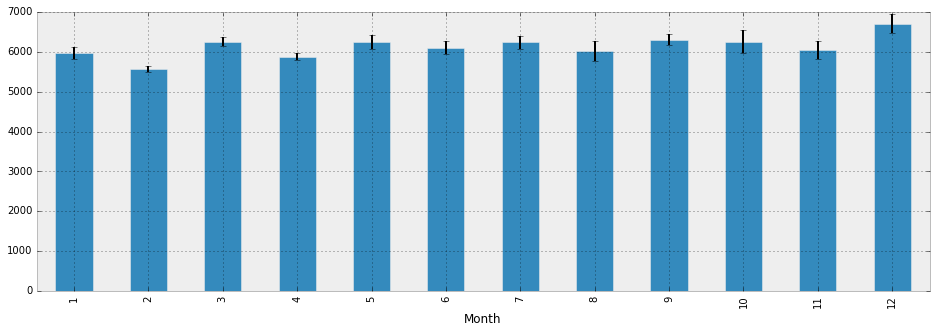

In [18]:
mean.plot.bar(figsize=(16, 5),yerr=stdev)

Ok, so now we get to see the average (mean) on a given month (over the 3 years) and the standard deviation, aka the usual spread / scatter (keeping it real simple here).

What it does tell us is that for example January will tend to average around 6000 interventions and always be really close to that.
If you compare it to August, the average is roughly the same but the Standard deviation is much bigger (almost twice), which means that if you were to use that to forecast for 2016, you could expect a number much far off the 6k mark.

The only new element here is (besides the use of mean() and std()) using the yerr param to display the standard dev.
This is a MPL specific and you'll need to dig into their [doc](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) although this is pretty much a copy / paste from Pandas visualation guide.

---

#### Daily average

There's still one last thing which bugs me quite a bit.
If you look at the above graphs / tables, you'd think that a month like February is actually less intense than say its neighbours January or March but let's not forget that February has only 28 (/29) days whereas both January and March have 31 days.

So let's look into normalizing this to have a per day average (/mean) through the use of some form of weighted average

In [19]:
year_range=pd.date_range('2013-1-1', periods=12, freq='M')
year_range

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31'],
              dtype='datetime64[ns]', freq='M')

We're using the [date_range](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#generating-ranges-of-timestamps) function to generate a Series of month.

The idea is to use this to leverage the DateTime helpers (the same we use in our Group By) to generate a Series of days in month for each month.

For the sake of simplicity, I'm only using one year here because there will is no leap year in this range.

---

year_range is not a Series so we'll need to convert it to one in order to use the DT helpers :

In [20]:
days_in_month=year_range.to_series().dt.daysinmonth
days_in_month

2013-01-31    31
2013-02-28    28
2013-03-31    31
2013-04-30    30
2013-05-31    31
2013-06-30    30
2013-07-31    31
2013-08-31    31
2013-09-30    30
2013-10-31    31
2013-11-30    30
2013-12-31    31
Freq: M, dtype: int64

Now that we have our days in a month, we'll need to change the index to match our Grouped View.

**Not doing that will mean that Pandas won't match those days to our existing view and you'll end up with NaN if you try to join/insert this in the view**

In [21]:
days_in_month.index=year_range.to_series().dt.month
days_in_month

1     31
2     28
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
dtype: int64

We can now simply loop over the columns of our View and divide them by the days in the month series.

We could also insert the Series into the DataFrame but there's no benefit to do that in this case.

In [22]:
cols=unstacked_month_year.columns
weightedaverage_month_year=pd.DataFrame()
for i in cols:
    weightedaverage_month_year[i]=unstacked_month_year[i]/days_in_month
weightedaverage_month_year

,2013,2014,2015
Month,,,
1,193.032258,187.935484,197.129032
2,196.178571,200.821429,201.035714
3,205.548387,198.645161,201.096774
4,197.733333,192.666667,197.633333
5,201.612903,195.741935,206.838710
6,204.533333,197.433333,208.033333
7,205.709677,195.451613,202.354839
8,191.612903,188.129032,202.967742
9,209.100000,205.933333,215.033333


Let's generate a new plot (top) and display the old (non weighted, at the bottom) side by side to visually see how it impacts the result :

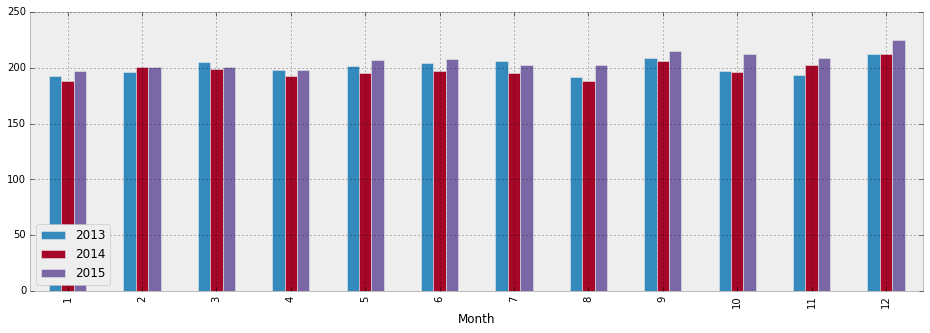

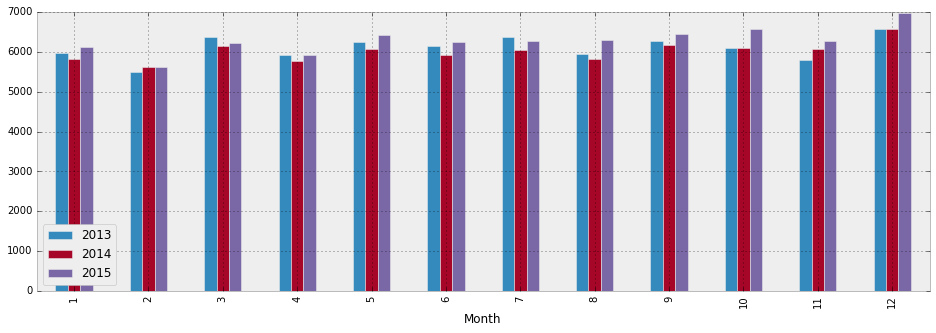

In [23]:
weightedaverage_month_year.plot.bar(figsize=(16, 5))
p.legend(loc=3)
unstacked_month_year.plot.bar(figsize=(16, 5))

p.legend(loc=3)


Same process for the average and standard deviation, weighted first then raw :

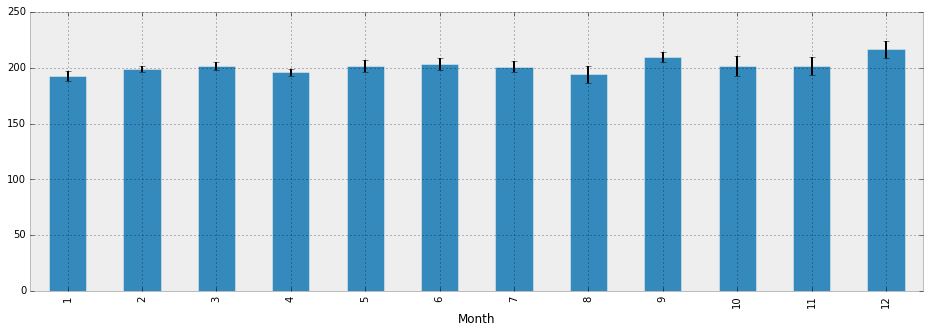

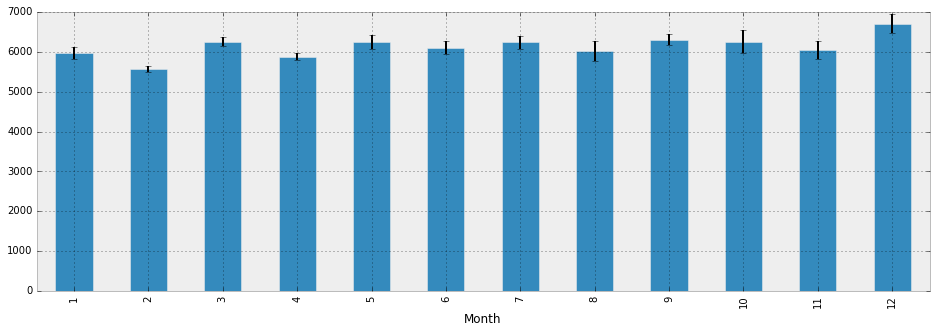

In [24]:
weightedaverage_year_month=weightedaverage_month_year.transpose()

weightedaverage_year_month.mean().plot.bar(figsize=(16, 5),yerr=weightedaverage_year_month.std())
p.show()
mean.plot.bar(figsize=(16, 5),yerr=stdev)
p.show()

Ok, now we can clearly see that February has actually a fairly average workload, January and August would be the least busy and finally September and December are the toughest ones.

That's it for now, thanks for reading.